# Sidewall convection


## Initialize and setup simulation parameters

This example is based on [this study](https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/abs/from-onset-of-unsteadiness-to-chaos-in-a-differentially-heated-square-cavity/617F4CB2C23DD74C3D0CB872AE7C0045). The configuration is a square cavity. The contol parameters are Prandtl $= 0.71$ and Rayleigh $= 1.86 \times 10^{8}$. The mesh size is $64 \times 64$. We want to have $25$ probes (history points) to record the variable signals. We will use these probe signals in monitoring and postprocessing of the simulation. See [this example](https://github.com/snek5000/snek5000-cbox/blob/gh-actions/doc/examples/run_side_short.py) for the implementation. The simulation was executed as follows:

```py
import numpy as np

from snek5000_cbox.solver import Simul

params = Simul.create_default_params()

aspect_ratio = params.oper.aspect_ratio = 1.0
params.prandtl = 0.71

# The onset of oscillatory flow for aspect ratio 1.0 is at Ra_c = 1.825e8
params.Ra_side = 1.86e8

params.output.sub_directory = "examples_cbox/simple/SW"

params.oper.dim = 2

nb_elements = ny = 8
params.oper.ny = nb_elements
nx = params.oper.nx = int(nb_elements / aspect_ratio)
params.oper.nz = int(nb_elements / aspect_ratio)

Ly = params.oper.Ly
Lx = params.oper.Lx = Ly / aspect_ratio
Lz = params.oper.Lz = Ly / aspect_ratio

order = params.oper.elem.order = params.oper.elem.order_out = 8

params.oper.mesh_stretch_factor = 0.08  # zero means regular

params.short_name_type_run = f"Ra{params.Ra_side:.3e}_{nx*order}x{ny*order}"

# creation of the coordinates of the points saved by history points
n1d = 5
small = Lx / 10

xs = np.linspace(0, Lx, n1d)
xs[0] = small
xs[-1] = Lx - small

ys = np.linspace(0, Ly, n1d)
ys[0] = small
ys[-1] = Ly - small

coords = [(x, y) for x in xs for y in ys]

params.output.history_points.coords = coords
params.oper.max.hist = len(coords) + 1

params.nek.general.end_time = 800
params.nek.general.stop_at = "endTime"
params.nek.general.target_cfl = 2.0
params.nek.general.time_stepper = "BDF3"
params.nek.general.extrapolation = "OIFS"

params.nek.general.write_control = "runTime"
params.nek.general.write_interval = 10

params.output.history_points.write_interval = 10

sim = Simul(params)
sim.make.exec('run', resources={"nproc": 4})
```

Here we load and process the output.

## Postprocessing

In this section, we give a brief tutorial of ...

We can load the simulation:

In [60]:
from snek5000 import load

sim = load('examples_cbox/simple/SW/cbox_Ra1.860e+08_64x64_8x8_V1.x1._2022-10-19_14-08-46')

[10/20/22 14:22:49] INFO     Trying to open the path relative to $FLUIDSIM_PATH                        ]8;id=372784;file:///home/arman/Dev/snek5000/src/snek5000/util/files.py\files.py]8;;\:]8;id=141237;file:///home/arman/Dev/snek5000/src/snek5000/util/files.py#181\181]8;;\

                    WARNING  Missing a configuration file describing compilers and flags. Create one at ]8;id=145863;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py\base.py]8;;\:]8;id=475210;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py#250\250]8;;\
                             either of the following paths to avoid future warnings:                               
                             /home/arman/.config/snek5000/khouban.yml                                              
                             /home/arman/.config/snek5000.yml                                                      
                             /home/arman/Dev/Dev/snek5000-cbox/src/snek5000_cbox/etc/khouban.yml                   

                    INFO     Using default configuration for now:                                       ]8;id=189176;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py\base.py]8;;\:]8;id=921314;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py#259\259]8;;\
                             /home/arman/Dev/snek5000/src/snek5000/assets/default_configfile.yml                   

                    INFO     path_run:                                                                  ]8;id=334080;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py\base.py]8;;\:]8;id=198564;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py#758\758]8;;\
                             /home/arman/Sim_data/examples_cbox/simple/SW/cbox_Ra1.860e+08_64x64_8x8_V1            
                             .x1._2022-10-19_14-08-46                                                              

                    INFO     session_id: 0                                                              ]8;id=972395;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py\base.py]8;;\:]8;id=637019;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py#759\759]8;;\

                    INFO     sim:                        <class 'snek5000_cbox.solver.SimulCbox'>       ]8;id=334419;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py\base.py]8;;\:]8;id=559878;file:///home/arman/Dev/snek5000/src/snek5000/output/base.py#766\766]8;;\
                             sim.oper:                   <class 'snek5000.operators.Operators'>                    
                             sim.output.print_stdout:    <class                                                    
                             'snek5000.output.print_stdout.PrintStdOut'>                                           
                             sim.output.phys_fields:     <class                                                    
                             'snek5000.output.phys_fields.PhysFields'>                                             
                             sim.output.history_points:  <class                                                    
                             'snek5000.output.history_points.HistoryPoints'>                                       
                             sim.output:                 <class 'snek5000_cbox.output.OutputCbox'>                 
                             sim.make:                   <class 'snek5000.make.Make'>                              
                                                                                                                   

we can plot all the history points for one variable like $u_x$

<AxesSubplot:title={'center':'cbox, Ra1.860e+08, 64x64, 8x8, V1.x1., 2022-10-19, 14-08-46'}, xlabel='time', ylabel='ux'>

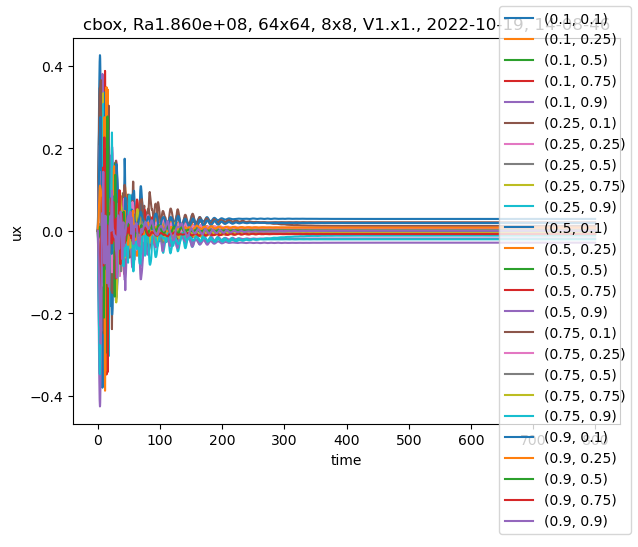

In [61]:
sim.output.history_points.plot(key='ux')


or just one history point

  size_file = 2314932
  nb_chars_not_read = 0


<AxesSubplot:title={'center':'cbox, Ra1.860e+08, 64x64, 8x8, V1.x1., 2022-10-19, 14-08-46\ntemperature, (x, y) = (0.1, 0.1)'}, xlabel='time', ylabel='temperature'>

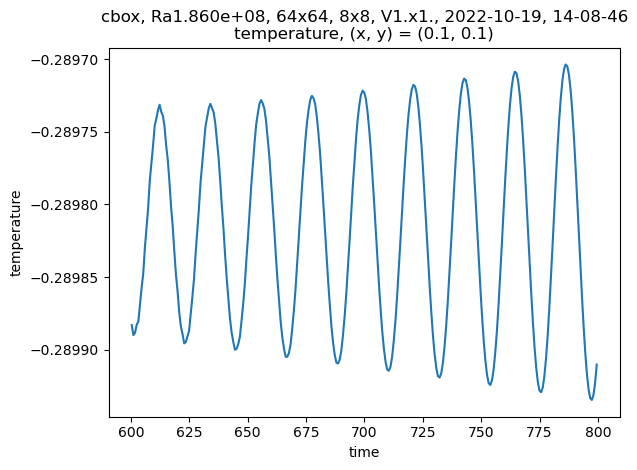

In [62]:

sim.output.history_points.plot_1point(index_point=0, key='temperature', tmin=600, tmax=800)


Also we can load the history points data to compute growth rate

In [63]:
import numpy as np
from scipy import stats
from scipy.signal import argrelmax

coords, df = sim.output.history_points.load()
df_point = df[df.index_points == 12]
time = df_point["time"].to_numpy()
ux = df_point["ux"].to_numpy()

indx = np.where(time > 700)[0][0]
time = time[indx:]
ux = ux[indx:]
signal = ux

arg_local_max = argrelmax(signal)
time_local_max = time[arg_local_max]
signal_local_max = signal[arg_local_max]

slope, intercept, r_value, p_value, std_err = stats.linregress(
    time_local_max, np.log(signal_local_max)
)

growth_rate = slope
print("Growth rate is:", growth_rate)

  size_file = 2314932
  nb_chars_not_read = 0
Growth rate is: 0.0023019255530447253


There is also the possibility to load to whole field file in [xarray dataset](https://docs.xarray.dev/en/stable/index.html)

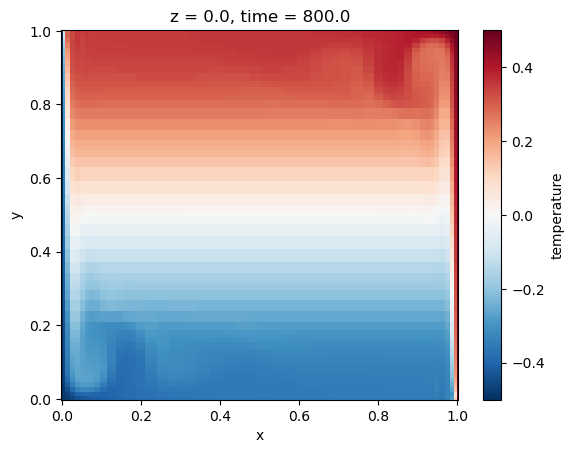

In [64]:

field = sim.output.phys_fields.load()

field.temperature.plot()

which makes postprocessing of data easier

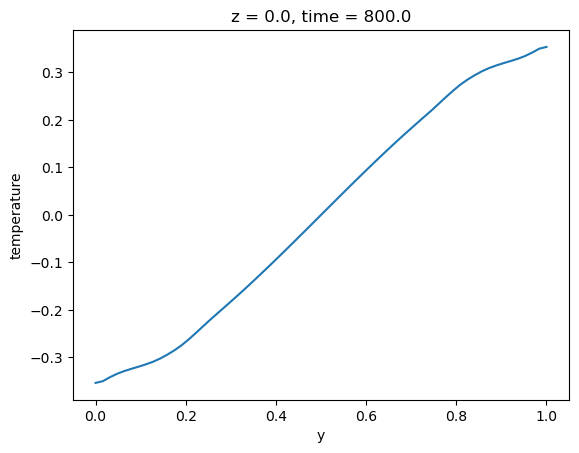

In [65]:
x_new = np.linspace(field.x[0], field.x[-1], field.x.size)
y_new = np.linspace(field.y[0], field.y[-1], field.y.size)

field = field.drop_duplicates(["x", "y"])
field = field.interp(x=x_new, y=y_new)

field.temperature.mean('x').plot()

## Versions used in this tutorial

In [66]:
import snakemake
snakemake.__version__

'6.12.3'

In [67]:
import snek5000
snek5000.__version__

'0.8.0rc1.dev12+gff69ab3.d20221018'